# Inception_v3 Model

### <u>Action Classes - 15</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import inception_v3

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-25 16:11:23.973814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:11:24.010132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:11:24.010439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)


In [4]:
image_size = (299,299)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 3767 images belonging to 15 classes.
Found 934 images belonging to 15 classes.
Found 934 images belonging to 15 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Biking': 3,
 'Diving': 4,
 'Fencing': 5,
 'Kayaking': 6,
 'MilitaryParade': 7,
 'PizzaTossing': 8,
 'ShavingBeard': 9,
 'SkateBoarding': 10,
 'SumoWrestling': 11,
 'TennisSwing': 12,
 'Typing': 13,
 'WritingOnBoard': 14}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

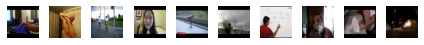

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

## Initialize model

In [8]:
inception_v3_model_top = inception_v3.InceptionV3(include_top=True,
                   input_shape=(299,299,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(inception_v3_model_top.layers):
    print((i, layer.name, layer.output_shape))

2022-08-25 16:11:24.816508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 16:11:24.817331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:11:24.817682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 16:11:24.817988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 299, 299, 3)])
(1, 'conv2d', (None, 149, 149, 32))
(2, 'batch_normalization', (None, 149, 149, 32))
(3, 'activation', (None, 149, 149, 32))
(4, 'conv2d_1', (None, 147, 147, 32))
(5, 'batch_normalization_1', (None, 147, 147, 32))
(6, 'activation_1', (None, 147, 147, 32))
(7, 'conv2d_2', (None, 147, 147, 64))
(8, 'batch_normalization_2', (None, 147, 147, 64))
(9, 'activation_2', (None, 147, 147, 64))
(10, 'max_pooling2d', (None, 73, 73, 64))
(11, 'conv2d_3', (None, 73, 73, 80))
(12, 'batch_normalization_3', (None, 73, 73, 80))
(13, 'activation_3', (None, 73, 73, 80))
(14, 'conv2d_4', (None, 71, 71, 192))
(15, 'batch_normalization_4', (None, 71, 71, 192))
(16, 'activation_4', (None, 71, 71, 192))
(17, 'max_pooling2d_1', (None, 35, 35, 192))
(18, 'conv2d_8', (None, 35, 35, 64))
(19, 'batch_normalization_8', (None, 35, 35, 64))
(20, 'activation_8', (None, 35, 35, 64))
(21, 'conv2d_6', (None, 35, 35, 48))
(22, 'conv2d_9', (None, 35, 35, 96))
(23, 'batch_normalization_6

In [9]:
inception_v3_model = inception_v3.InceptionV3(include_top=False,
                   input_shape=(299,299,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for (i,layer) in enumerate(inception_v3_model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape))

(0, 'input_2', [(None, 299, 299, 3)])
(1, 'conv2d_94', (None, 149, 149, 32))
(2, 'batch_normalization_94', (None, 149, 149, 32))
(3, 'activation_94', (None, 149, 149, 32))
(4, 'conv2d_95', (None, 147, 147, 32))
(5, 'batch_normalization_95', (None, 147, 147, 32))
(6, 'activation_95', (None, 147, 147, 32))
(7, 'conv2d_96', (None, 147, 147, 64))
(8, 'batch_normalization_96', (None, 147, 147, 64))
(9, 'activation_96', (None, 147, 147, 64))
(10, 'max_pooling2d_4', (None, 73, 73, 64))
(11, 'conv2d_97', (None, 73, 73, 80))
(12, 'batch_normalization_97', (None, 73, 73, 80))
(13, 'activation_97', (None, 73, 73, 80))
(14, 'conv2d_98', (None, 71, 71, 192))
(15, 'batch_normalization_98', (None, 71, 71, 192))
(16, 'activation_98', (None, 71, 71, 192))
(17, 'max_pooling2d_5', (None, 35, 35, 192))
(18, 'conv2d_102', (None, 35, 35, 64))
(19, 'batch_normalization_102', (None, 35, 35, 64))
(20, 'activation_102', (None, 35, 35, 64))
(21, 'conv2d_100', (None, 35, 35, 48))
(22, 'conv2d_103', (None, 35, 35,

In [10]:
model = models.Sequential()

dense_layer_1 = Dense(32, activation='relu')
prediction_layer = Dense(15, activation='softmax')

model.add(inception_v3_model)
model.add(dense_layer_1)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
Total params: 21,868,847
Trainable params: 66,063
Non-trainable params: 21,802,784
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-15-model-inception_v3_model.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-25 16:11:33.853346: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-25 16:11:34.221907: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


377/377 [==============================] - 55s 133ms/step - loss: 0.8889 - accuracy: 0.7709 - val_loss: 0.3456 - val_accuracy: 0.9154
Epoch 2/20
377/377 [==============================] - 47s 124ms/step - loss: 0.1768 - accuracy: 0.9604 - val_loss: 0.2401 - val_accuracy: 0.9304
Epoch 3/20
377/377 [==============================] - 47s 125ms/step - loss: 0.0913 - accuracy: 0.9817 - val_loss: 0.2020 - val_accuracy: 0.9347
Epoch 4/20
377/377 [==============================] - 49s 131ms/step - loss: 0.0556 - accuracy: 0.9907 - val_loss: 0.1878 - val_accuracy: 0.9433
Epoch 5/20
377/377 [==============================] - 58s 155ms/step - loss: 0.0360 - accuracy: 0.9944 - val_loss: 0.2217 - val_accuracy: 0.9229
Epoch 6/20
377/377 [==============================] - 73s 193ms/step - loss: 0.0241 - accuracy: 0.9968 - val_loss: 0.2060 - val_accuracy: 0.9304
Epoch 7/20
377/377 [==============================] - 77s 205ms/step - loss: 0.0145 - accuracy: 0.9995 - val_loss: 0.1852 - val_accuracy: 0.9

In [14]:
model.save("./models/action-class-15-trained-inception_v3_model.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-15-trained-inception_v3_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 15)                495       
                                                                 
Total params: 21,868,847
Trainable params: 66,063
Non-trainable params: 21,802,784
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

94/94 [==============================] - 12s 109ms/step - loss: 0.2655 - accuracy: 0.9379


[0.265487939119339, 0.937901496887207]

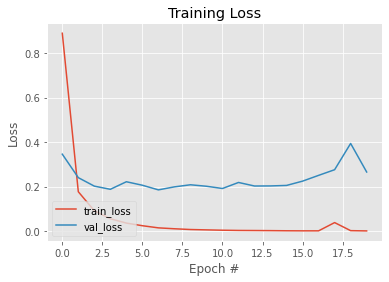

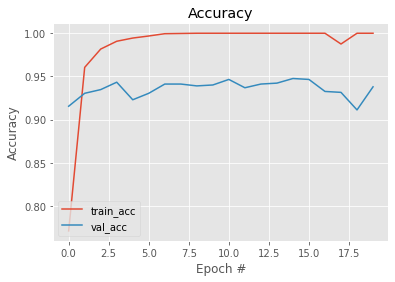

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20))

Avg Val Acc: 0.9355995684862137
Avg Val Loss: 0.23134735822677613
